<a href="https://colab.research.google.com/github/ginox99/Three_Body-Simuation/blob/main/Three_Body_Simuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
# #Earth-Moon-Sun Partmeters
# G = 6.67*10**(-11)
# m1 = 1.989*10**30 #sun
# m2 = 5.972*10**24 #earth
# m3 = 7.348*10**22 #moon

# # Initial positions for E-M-S
# r1 = [0,0,0]
# r2 = [149.6*10**9,0,0]
# r3 = [1.49984*10**11,0,0]

# # Initial velocity for E-M-S
# v1 = [0,0,0]
# v2 = [0,30000,0]
# v3 = [0,33000,0]

#Partmeters for Simulation
G = 0.2
m1 = 1.1
m2 = 0.907
m3 = 1.0

# Initial positions for Simulation
r1=[-0.5,0,0]
r2=[0.5,0,0]
r3=[0,1,0]

#Initial velocity for Simulation
v1 = [0.07,0.07,0]
v2 = [-0.35,0.07,-0.7]
v3 = [0,-0.07,0]

#Store parameters into array
param = np.array([G,m1,m2,m3])
state = np.array([r1,r2,r3,v1,v2,v3])
state = state.flatten()

In [ ]:
# Define function to calculate positions and store them into array
def ThreeBody(state, t, param):
    G = param[0]
    m1 = param[1]
    m2 = param[2]
    m3 = param[3]
    r1 = state[:3]
    r2 = state[3:6]
    r3 = state[6:9]
    v1 = state[9:12]
    v2 = state[12:15]
    v3 = state[15:18]

    #Distance bewteen two stars
    r12 = np.linalg.norm(r2-r1)
    r13 = np.linalg.norm(r3-r1)
    r23 = np.linalg.norm(r3-r2)

    #First-order differential equations
    dr1 = v1
    dr2 = v2
    dr3 = v3
    dv1 = G * m2 * (r2 - r1) / r12 ** 3 + G * m3 * (r3 - r1) / r13 ** 3
    dv2 = G * m1 * (r1 - r2) / r12 ** 3 + G * m3 * (r3 - r2) / r23 ** 3
    dv3 = G * m1 * (r1 - r3) / r13 ** 3 + G * m2 * (r2 - r3) / r23 ** 3

    #Combine arrays into one
    dr = np.concatenate((dr1,dr2,dr3))
    dv = np.concatenate((dv1,dv2,dv3))
    derivs = np.concatenate((dr,dv))

    return derivs

In [ ]:
#Import rk4 function from [Author's Name]'s implementation
def rk4(x,t,tau,derivsRK,param):
    """Runge-Kutta integrator (4th order)
       Input arguments -
        x = current value of dependent variable
        t = independent variable (usually time)
        tau = step size (usually timestep)
        derivsRK = right hand side of the ODE; derivsRK is the
                  name of the function which returns dx/dt
                  Calling format derivsRK (x,t,param).
        param = extra parameters passed to derivsRK
       Output arguments -
        xout = new value of x after a step of size tau
    """

    half_tau = 0.5*tau
    F1 = derivsRK(x,t,param)
    t_half = t + half_tau
    xtemp = x + half_tau*F1
    F2 = derivsRK(xtemp,t_half,param)
    xtemp = x + half_tau*F2
    F3 = derivsRK(xtemp,t_half,param)
    t_full = t + tau
    xtemp = x + tau*F3
    F4 = derivsRK(xtemp,t_full,param)
    xout = x + tau/6.*(F1 + F4 + 2.*(F2+F3))
    return xout

In [ ]:
N = 15000 #Num of steps
t = 0 #Intial value of time
tau = 0.001 #Step_size

#Initialize lists to store time and position values
t_list = [0]
position = [r1 + r2 + r3]

#Integrate using the RK4
while t <= N-2:
  state = rk4(state,t,tau,ThreeBody,param)
  t += 1
  t_list.append(t)
  position.append(list(state[:9]))

positions = np.array(position)

#Extract postions for each planet from the array
p1 = positions[:,:3]
p2 = positions[:,3:6]
p3 = positions[:,6:9]

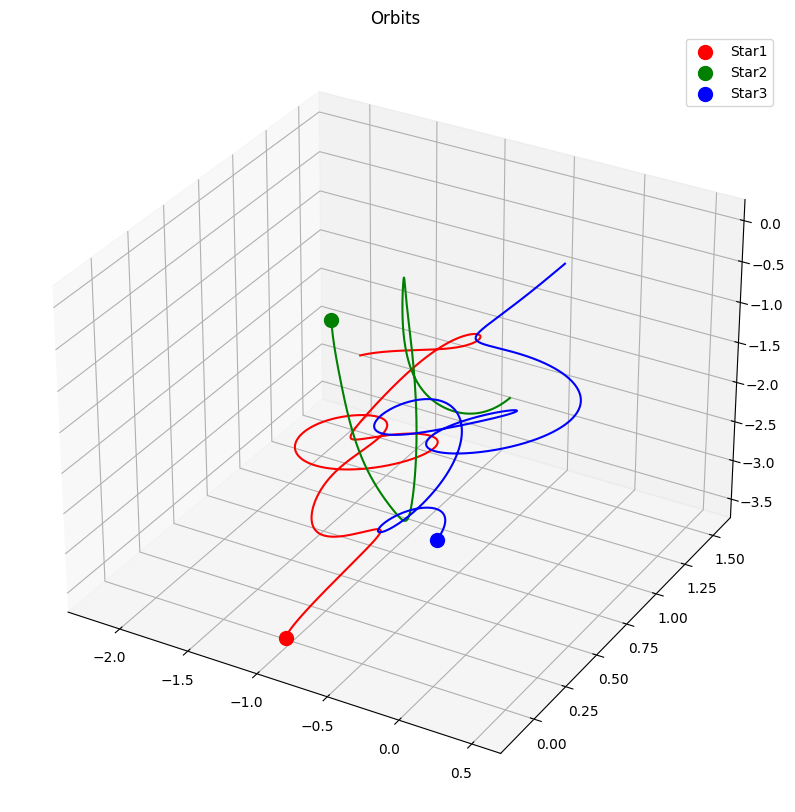

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection="3d")

# Plot the orbits in 3D
ax.plot(p1[:, 0], p1[:, 1], p1[:, 2],color = 'red')
ax.plot(p2[:, 0], p2[:, 1], p2[:, 2],color = 'green')
ax.plot(p3[:, 0], p3[:, 1], p3[:, 2],color = 'blue')

#Plot the final location of stars
ax.scatter(p1[-1,0],p1[-1,1],p1[-1,2],color="red",marker="o",s=100,label="Star1")
ax.scatter(p2[-1,0],p2[-1,1],p2[-1,2],color="green",marker="o",s=100,label="Star2")
ax.scatter(p3[-1,0],p3[-1,1],p3[-1,2],color="blue",marker="o",s=100,label="Star3")

plt.title("Orbits")
plt.legend()
plt.show()

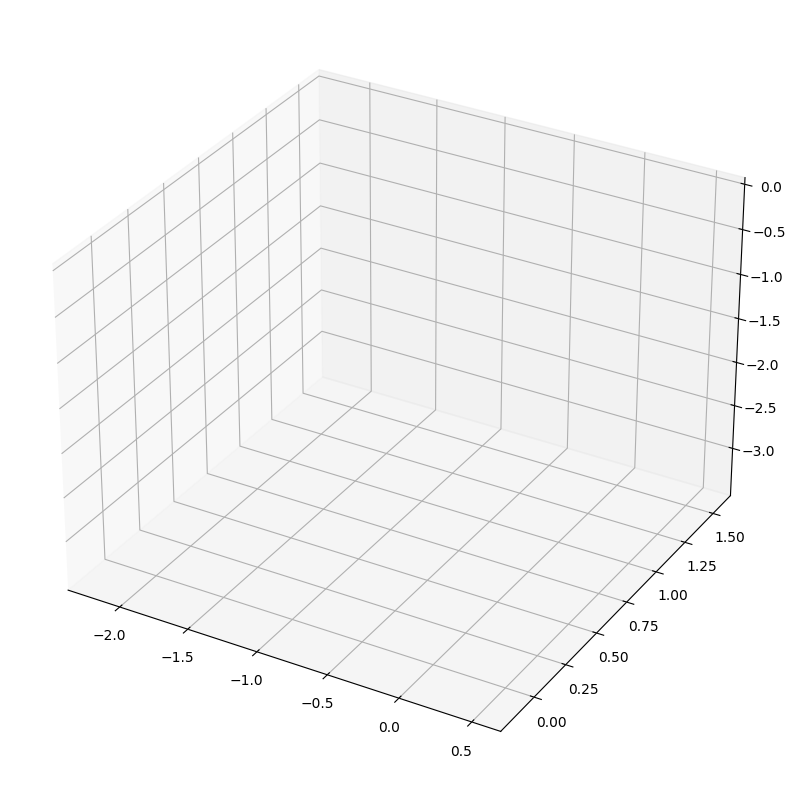

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection="3d")

line1, = ax.plot(p1[:, 0], p1[:, 1], p1[:, 2],color = 'red')
line2, = ax.plot(p2[:, 0], p2[:, 1], p2[:, 2],color = 'green')
line3, = ax.plot(p3[:, 0], p3[:, 1], p3[:, 2],color = 'blue')

#Define the update function for the animation
def update(num, line1, line2, line3):
    line1.set_data(p1[:num, 0], p1[:num, 1])
    line1.set_3d_properties(p1[:num, 2])
    line2.set_data(p2[:num, 0], p2[:num, 1])
    line2.set_3d_properties(p2[:num, 2])
    line3.set_data(p3[:num, 0], p3[:num, 1])
    line3.set_3d_properties(p3[:num, 2])
    return line1, line2, line3

#Create the animation using FuncAnimation
ani = FuncAnimation(fig, update, frames=len(t_list), fargs=(line1, line2, line3), interval=10)

# Display the animation in Jupyter Notebook
HTML(ani.to_html5_video())